In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

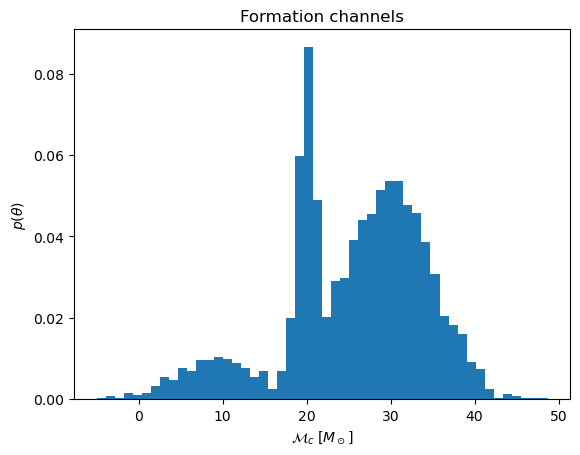

In [163]:
dati = np.load('C:/Users/hp/.spyder-py3/astrostatistics_bicocca_2024/solutions/formationchannels.npy')
plt.hist(dati, bins = 50, density = True)
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel(r'$p(\theta)$')
plt.title('Formation channels')
plt.show()

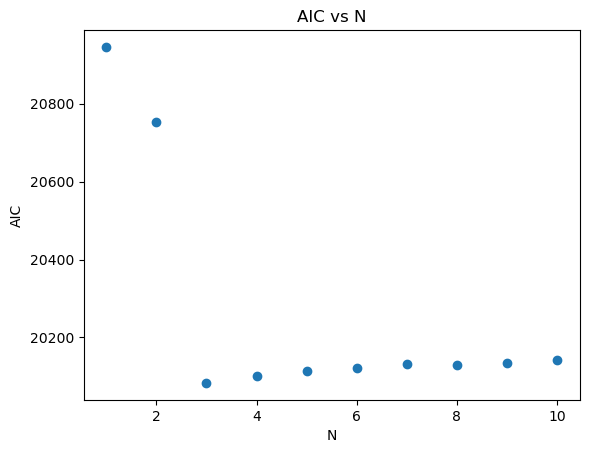

In [164]:
N = [1,2,3,4,5,6,7,8,9,10]
AIC = []
for i in N:
    gm = GaussianMixture(n_components=i, random_state=0).fit(dati)
    #fig = plt.figure()
    #plt.hist(dati, bins = 50, density = True)
    #plt.plot(a, np.exp(gm.score_samples(a[:,np.newaxis])))
    AIC.append(gm.aic(dati))
    i = i+1

plt.scatter(N, AIC)
plt.xlabel('N')
plt.ylabel('AIC')
plt.title('AIC vs N')
plt.show()

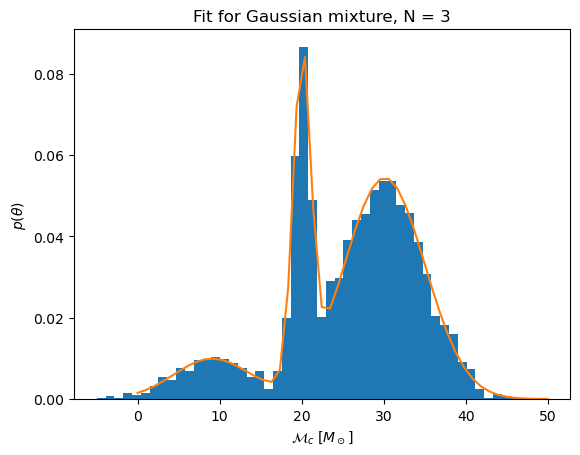

In [167]:
a = np.linspace(0,50)

gm = GaussianMixture(n_components=3, random_state=0).fit(dati)
plt.hist(dati, bins = 50, density = True)
plt.plot(a, np.exp(gm.score_samples(a[:,np.newaxis])))
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel(r'$p(\theta)$')
plt.title('Fit for Gaussian mixture, N = 3')
plt.show()

In [168]:
means = gm.means_
variances = np.sqrt(gm.covariances_)

In [196]:
#assumption: the values contribute to the gaussian to which they are closest with respect to the mean and the variance of given gaussian.

In [197]:
distances = np.array([value-np.array(means) for value in dati] ) 
#check what should be the right way
dist_1 = means[2]+ 1.5*variances[2]
dist_2 = means[1]+ 1.5*variances[1]

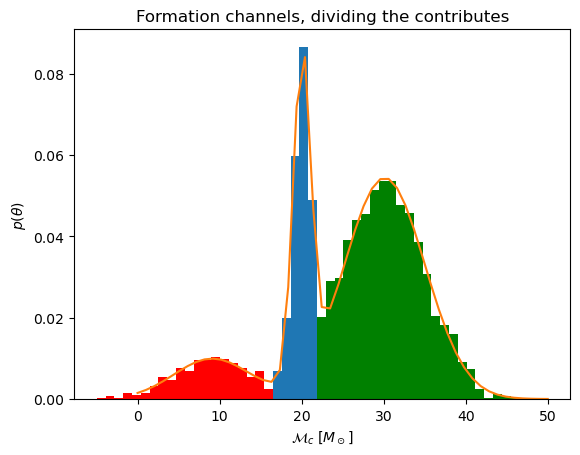

In [198]:
ax = plt.gca()
N, bins, patches = ax.hist(dati, linewidth=1, bins = 50, density = True)
for i, value in enumerate(bins):
    if value < dist_1: 
        patches[i].set_facecolor('red')
    if (value > dist_1) & (value> dist_2):    
        patches[i].set_facecolor('blue')
    if value > dist_2:
        if i == len(patches)-1:
            break
        patches[i].set_facecolor('green')

plt.plot(a, np.exp(gm.score_samples(a[:,np.newaxis])))
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel(r'$p(\theta)$')
plt.title('Formation channels, dividing the contributes')
plt.show()